Yar video dekh le : [youtube video link](https://www.youtube.com/watch?v=HLF4bFbBgwk&list=PLKnIA16_RmvZuSEZ24Wlm13QpsfLlJBM4&index=6)

# How are Coefficient affected ?

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [14]:
data = load_diabetes()
df = pd.DataFrame(data.data , columns = data.feature_names)
df['target'] = data.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [15]:
x_train , x_test , y_train , y_test = train_test_split(data.data , data.target , test_size = 0.2 , random_state = 2)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


In [17]:
coefs = []
r2_scores =[]

for i in [0, 0.1, 1 , 10] :
  reg = Lasso(alpha = i )
  reg.fit(x_train, y_train)

  coefs.append(reg.coef_.tolist())
  r2_scores.append(r2_score(y_test , reg.predict(x_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

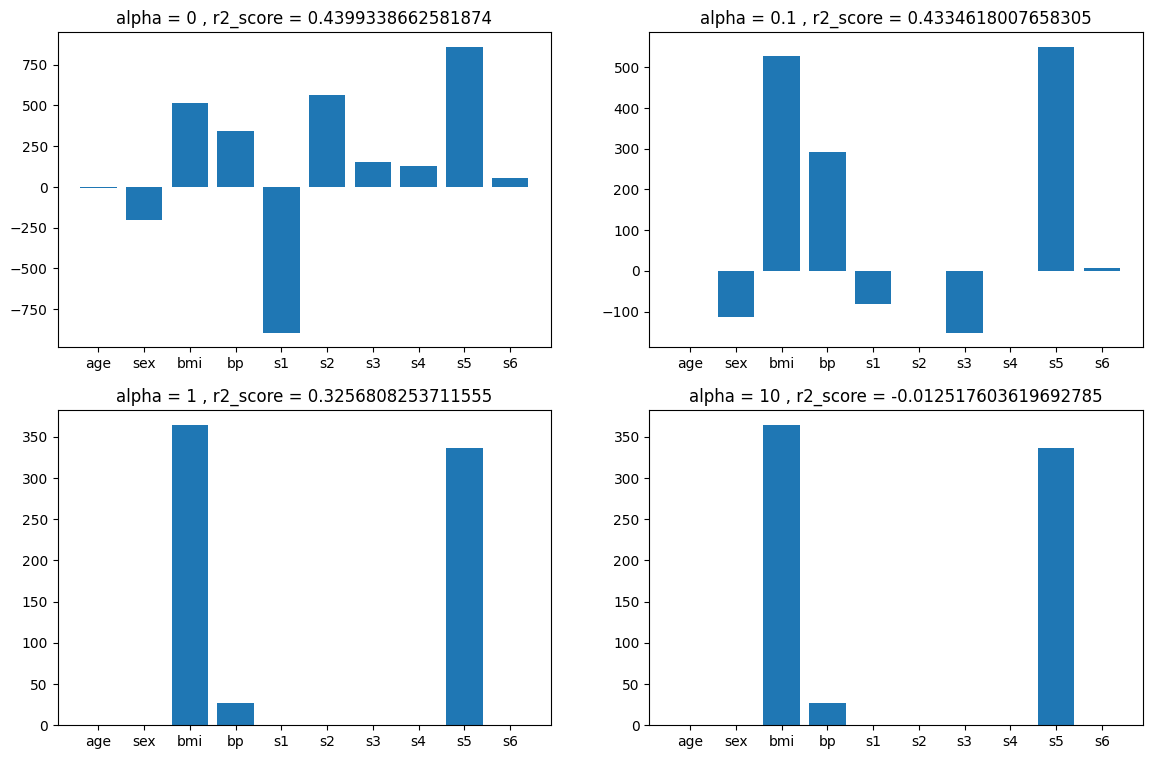

In [20]:
plt.figure(figsize =(14,9))

plt.subplot(221)
plt.bar(data.feature_names , coefs[0])
plt.title(f"alpha = 0 , r2_score = {r2_scores[0]}")

plt.subplot(222)
plt.bar(data.feature_names , coefs[1])
plt.title(f"alpha = 0.1 , r2_score = {r2_scores[1]}")

plt.subplot(223)
plt.bar(data.feature_names , coefs[2])
plt.title(f"alpha = 1 , r2_score = {r2_scores[2]}")

plt.subplot(224)
plt.bar(data.feature_names , coefs[2])
plt.title(f"alpha = 10 , r2_score = {r2_scores[3]}")

plt.show()

# 2. Higher coefficients are affected more

In [39]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas :
  reg = Lasso(alpha = i )
  reg.fit(x_train ,y_train)

  coefs.append(reg.coef_.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [40]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array , columns = data.feature_names)
coef_df['alphas'] = alphas
coef_df.set_index('alphas')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alphas,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [41]:
input_array[:10]

array([[  -9.15865318, -205.45432152,  516.69374477,  340.61999899,
        -895.55198905,  561.22066898,  153.89310382,  126.73139522,
         861.12699676,   52.42112237],
       [  -9.06906443, -205.32940644,  516.78941848,  340.53237885,
        -888.66090377,  555.95858353,  150.5936554 ,  125.45014323,
         858.64554075,   52.3802936 ],
       [  -8.26276976, -204.20536429,  517.65007282,  339.7439007 ,
        -826.6636033 ,  508.61739504,  120.90860746,  113.92177296,
         836.32075334,   52.01284899],
       [  -1.35972089, -192.93718018,  526.35651446,  332.6411011 ,
        -430.22697505,  191.29547987,  -44.03491271,   68.98898658,
         688.39602778,   47.94061621],
       [   0.        , -113.96992829,  526.74439601,  292.62847198,
         -82.69368149,   -0.        , -152.68533835,    0.        ,
         551.08029055,    7.17099207],
       [   0.        ,    0.        ,  363.88574216,   27.27316304,
           0.        ,    0.        ,   -0.        ,    0

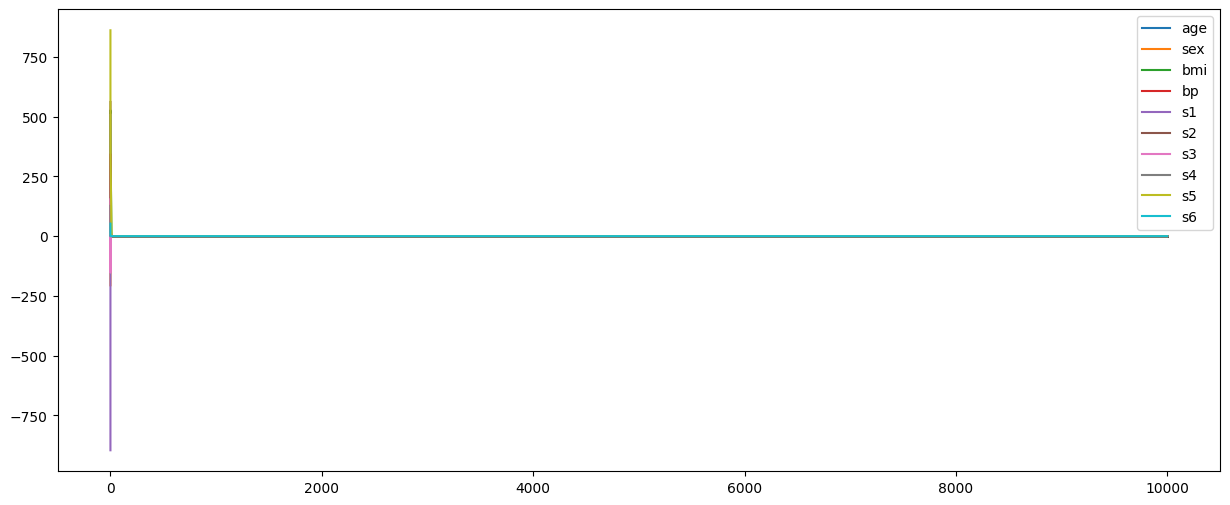

In [66]:
input_array = np.array(coefs).T

plt.figure(figsize =(15,6))
plt.plot(alphas , np.zeros(len(alphas)) , color = 'black' , linewidth = 2 )

for i in range(input_array.shape[0]):
  plt.plot(alphas , input_array[i] , label = data.feature_names[i] )

plt.legend()

all columns slop / wieghts are in 0